In [1]:
import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt 
import imutils

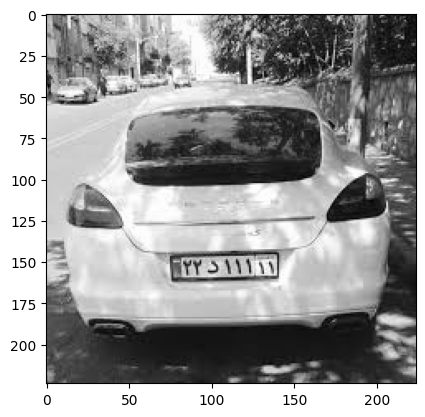

In [2]:
car_im = cv.imread('plat.jpg')
car_im_gr = cv.cvtColor(car_im,cv.COLOR_RGB2GRAY)
plt.imshow(cv.cvtColor(car_im_gr,cv.COLOR_BGR2RGB))

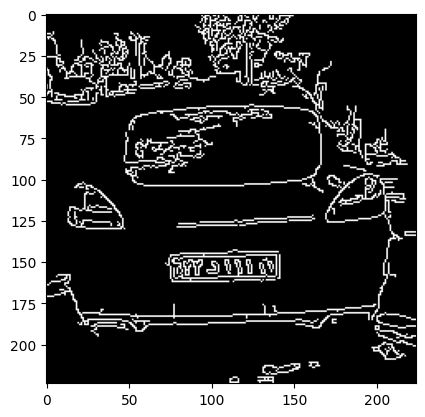

In [3]:
balatelar_filter = cv.bilateralFilter(car_im_gr,100,100,150)
edges = cv.Canny(balatelar_filter,30,200)
plt.imshow(cv.cvtColor(edges,cv.COLOR_BGR2RGB))

In [4]:
countors = cv.findContours(edges.copy(),cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
countors_refind = imutils.grab_contours(countors)
countors_sorted = sorted(countors_refind,key=cv.contourArea,reverse=True)[:4]

In [5]:
for countors in countors_sorted:
    countors_approx = cv.approxPolyDP(countors,10,True)
    if len(countors_approx) == 4 :
        palte_loc = countors_approx
        break

In [6]:
palte_loc

array([[[139, 158]],

       [[ 83, 160]],

       [[ 77, 149]],

       [[138, 146]]], dtype=int32)

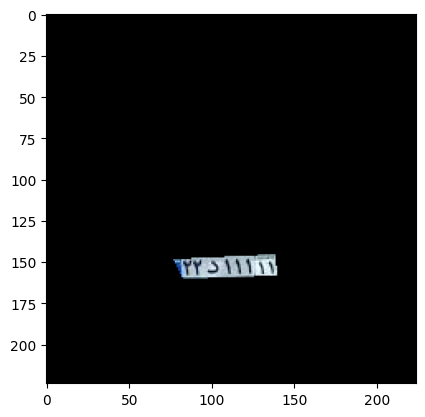

In [7]:
plate_mask0 = np.zeros(car_im_gr.shape,np.uint8)
plate_mask = cv.drawContours(plate_mask0,[palte_loc],0,255,-1)
car_im = cv.bitwise_and(car_im,car_im,mask=plate_mask)
plt.imshow(cv.cvtColor(car_im,cv.COLOR_BGR2RGB))

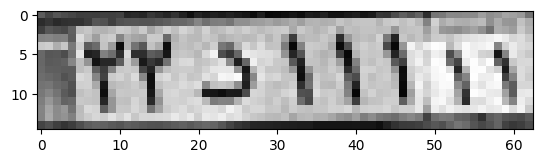

In [8]:
(x,y) = np.where(plate_mask==255)
(x1,y1) = (np.min(x),np.min(y))
(x2,y2) = (np.max(x),np.max(y))
cropet_image = car_im_gr[x1:x2+1,y1:y2+1]
plt.imshow(cv.cvtColor(cropet_image,cv.COLOR_BGR2RGB))